In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Preprocess data
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [ ]:
# Reshape data
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

In [ ]:
# Build model
model = keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(28 * 28,)),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train model
model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 5s 9ms/step - loss: 0.2670 - accuracy: 0.9245 - val_loss: 0.1391 - val_accuracy: 0.9597
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1071 - accuracy: 0.9687 - val_loss: 0.0906 - val_accuracy: 0.9728
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0694 - accuracy: 0.9798 - val_loss: 0.0781 - val_accuracy: 0.9769
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0489 - accuracy: 0.9857 - val_loss: 0.0699 - val_accuracy: 0.9783
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0358 - accuracy: 0.9895 - val_loss: 0.0620 - val_accuracy: 0.9805
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0269 - accuracy: 0.9923 - val_loss: 0.0602 - val_accuracy: 0.9812
Epoch 7/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0204 - accuracy: 0.9944 - val_loss: 0.0669 - val_accuracy: 0.9790
Epoch 

In [ ]:
# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0665 - accuracy: 0.9802
Test accuracy: 0.9801999926567078


In [9]:
x_test = x_test[:5]
y_test = y_test[:5]

In [11]:
# Sample Outputs
import numpy as np
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=1)
print("Predicted digits:", predictions)
print("Actual digits:", np.argmax(y_test, axis=1))

1/1 [==============================] - 0s 20ms/step
Predicted digits: [7 2 1 0 4]
Actual digits: [7 2 1 0 4]


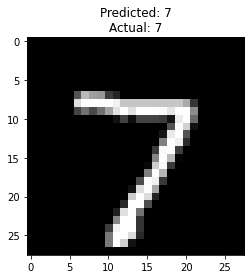

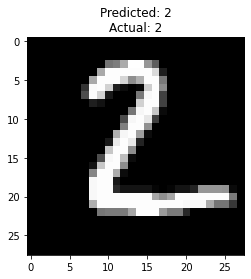

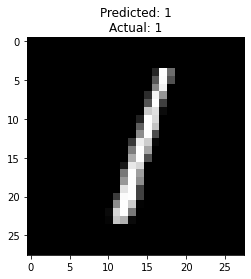

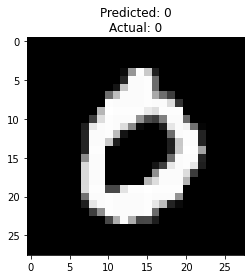

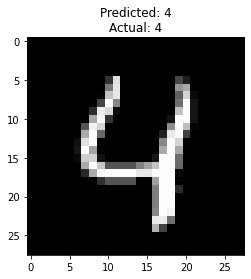

In [12]:
import matplotlib.pyplot as plt

# Plot the input images
for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Predicted: {}\nActual: {}".format(predictions[i], np.argmax(y_test[i])))
    plt.show()